# Model Evaluation and refinement

#### Objectives
    * Evaluate annd refine predictio modelss


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual

In [27]:
df = pd.read_csv('/Users/robertocandelario/DataGripProjects/Data analysis with python/IBM HR Analytics Employee Attrition & Performance/IBM HR Analytics.csv')
df.dropna(inplace= True)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Functions for plotting

In [68]:
def DistributioinPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist= False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist= False, color='b', label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')

    plt.show()
    plt.close()

In [100]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()


# Part 1: Training and Testing
### An important step in testing your model is to split your data into trainig and testing data. We will place the target data in a separate dataframe y_data:

In [30]:
y_data = df['MonthlyIncome']
x_data = df.drop('MonthlyIncome', axis=1)

In [31]:
# Randomly ssplit the data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 147
number of training samples: 1323


## Question #1):
##### Usse the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" Equal to zero. The output of the function should be the following: "x_train", "x_test1", y_train1", "y_test1"

In [45]:
# Write your code below annd press Shift enter to execut
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of testing samples:", x_test1.shape[0])
print('number of training samples: ', x_train1.shape[0])

number of testing samples: 588
number of training samples:  882


In [40]:
# Let's import Linear Regression from the Module Linear_Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [41]:
# we create a linear Regression Object:
lre = LinearRegression()

In [42]:
# We fit the model using the feature "Job_level"
lre.fit(x_train[['JobLevel']], y_train)

LinearRegression()

In [43]:
# Let's Calculate the R^2 on the test data:
lre.score(x_test[['JobLevel']], y_test)

0.8968228301124715

In [47]:
# Let's see the R^2 in the training data
lre.score(x_test[['JobLevel']], y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1323, 147]

# Question #2):
### Finnd the R^2 on the test data using 40% of the dataset for testing

In [48]:
# Write the code below and press shift enter to execute
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state= 0)
lre.fit(x_train1[['JobLevel']], y_train1)
lre.score(x_test1[['JobLevel']], y_test1)

0.9046559814595834

##### Sometimes we don not have sufficient teesting data: as a result we may want to perform cross_validationn. Let's Go over several methods that I can use for cross validation.

## Cross-validation score

###### Let's import model_selection from the module cross_val_score.

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
# we innput the object, the feature 'job level', and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

Rcross = cross_val_score(lre, x_data[['JobLevel']], y_data, cv= 4)


In [51]:
# The Default sscoring is R^2. Each element in the array has the average r^2 value for the fold
Rcross

array([0.90309637, 0.90735212, 0.91246786, 0.88305772])

In [52]:
# We can calculate the average and sstandard deviation of our estimate:
print("The mean of the foldss are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the foldss are 0.9014935154512362 and the standard deviation is 0.011149071654343147


# Quesstion #3):
## Calculate the average R^2 using two folds, then find the average R^2 for the seconnd fold utilizing the "horsepower" Feature:


In [54]:
Rc = cross_val_score(lre, x_data[['JobLevel']], y_data, cv=2)
Rc.mean()

0.9029919298644533

###### You can also usse the function "cross_val_predict" to predict the output. The function splits up the data into the specified number of folds, with onne fold for testing and the other folds are used for training. First, Import the function

In [55]:
from sklearn.model_selection import cross_val_predict

##### we input the object, the feature "jobLevel", and the targeet data y_data. The parameter 'cv' determines the number of folds. In this case it is 4.

In [57]:
yhat = cross_val_predict(lre, x_data[['JobLevel']], y_data, cv=4)
yhat[0:5]

array([6255.3839691 , 6255.3839691 , 2213.76478658, 2213.76478658,
       2213.76478658])

## Part 2: Overfitting, underfitting and Model Selection
###### It turn out that the test data, sometimes refereed to ass the "out of sample data", is a much better measure of how well your model performs inn the real world. One reason for this is overfitting

###### Let's go voer some examples. It turns out these differences are more apparennt inn multiple linnear regression and polynomial regressioin so we will explore overfitting in that context

###### Let's create multiple linear regressoin objecss and train the model using "Joblevel", XXX, XXXX,XXXX, XXXX as Features


In [73]:
lr = LinearRegression()
lr.fit(x_train[['JobLevel', 'Age', 'TotalWorkingYears', 'NumCompaniesWorked']], y_train)

LinearRegression()

###### Prediction using training data:

In [74]:
yhat_train = lr.predict(x_train[['JobLevel', 'Age', 'TotalWorkingYears', 'NumCompaniesWorked']])
yhat_train[0:5]

array([6172.28438063, 2047.69998996, 2201.60824502, 2078.67358997,
       6025.91701608])

###### Prediction using test data:

In [79]:
yhat_test = lr.predict(x_test[['JobLevel', 'Age', 'TotalWorkingYears', 'NumCompaniesWorked']])
yhat_test[0:5]

array([ 6164.35355755,  2042.91256944,  2335.82717839,  1931.736413  ,
       14804.14516839])

In [80]:
###### Let's examine the distribution of the predicted values of the training data.

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###### Let's examine the distribution of the predicted values of the training data.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


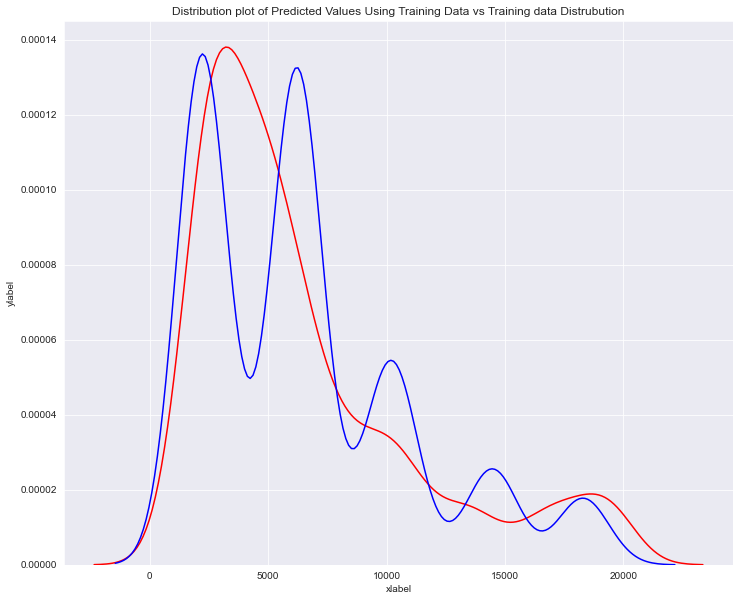

In [82]:
Title = "Distribution plot of Predicted Values Using Training Data vs Training data Distrubution"
DistributioinPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Valuess (Train)", Title)

### Overfitting

###### Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's Create a degree 5 polynomial model.

###### Let's use 55 percent of the data for training and the rest for testing:

In [87]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

###### We will perform a degree 5 polynomial transformation on the feature "Job_Level"

In [89]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['JobLevel']])
x_test_pr = pr.fit_transform(x_test[['JobLevel']])
pr

PolynomialFeatures(degree=5)

In [90]:
## Now let's create a linear regression model "poly" and train it

In [92]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [93]:
## We can see the output of our model using the method "Predict". WE assign the value to 'yhat'.

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([9847.27678571, 5444.45205479, 5444.45205479, 9847.27678571,
       2782.13157895])

###### Let's take the first five predicted values and cmompare it to the actual targets

In [97]:
print("pred values:", yhat[0:4])
print("True Values:", y_test[0:4].values)

pred values: [9847.27678571 5444.45205479 5444.45205479 9847.27678571]
True Values: [ 9980  4320  4614 10322]


InvalidIndexError: (slice(None, None, None), None)

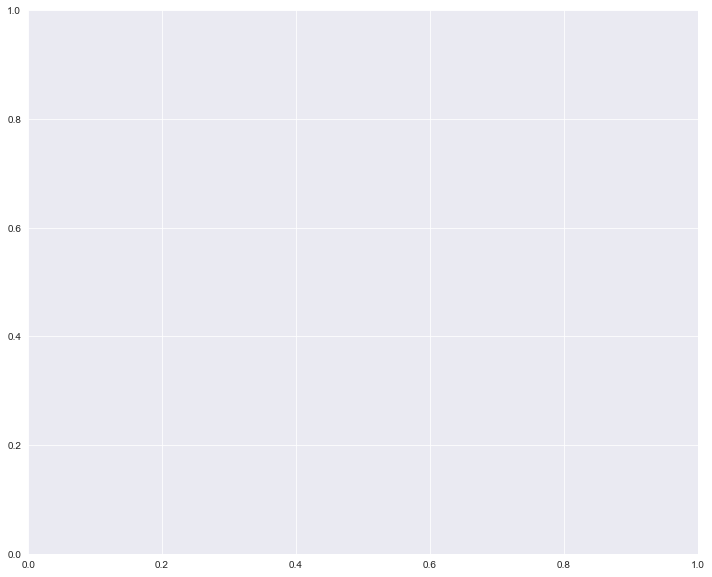

In [101]:
PollyPlot(x_train[['JobLevel']], x_test[['JobLevel']], y_train, y_test, poly,pr)

###### R^2 of the training data

In [102]:
poly.score(x_train_pr, y_train)

0.9263110205062789

###### R^2 of the test data

In [103]:
poly.score(x_test_pr, y_test)

0.9232872709520782

In [104]:
##### The Lower the R^2, the worse the model. A negative r^2 is a sign of overfitting